In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import f_oneway, kruskal


file_names = [f'trial_{i}.csv' for i in range(1, 21)]
list_of_dfs = [pd.read_csv(filename) for filename in file_names]
for i, df in enumerate(list_of_dfs):
    df['trial_number'] = i + 1

# Combine all dataframes into a single dataframe
full_df = pd.concat(list_of_dfs, ignore_index=True)

C:\Users\rc940\AppData\Local\Temp\ipykernel_23348\2226787810.py:10: DtypeWarning: Columns (3) have mixed types. Specify dtype option on import or set low_memory=False.
  list_of_dfs = [pd.read_csv(filename) for filename in file_names]
C:\Users\rc940\AppData\Local\Temp\ipykernel_23348\2226787810.py:10: DtypeWarning: Columns (2) have mixed types. Specify dtype option on import or set low_memory=False.
  list_of_dfs = [pd.read_csv(filename) for filename in file_names]
C:\Users\rc940\AppData\Local\Temp\ipykernel_23348\2226787810.py:10: DtypeWarning: Columns (2) have mixed types. Specify dtype option on import or set low_memory=False.
  list_of_dfs = [pd.read_csv(filename) for filename in file_names]
C:\Users\rc940\AppData\Local\Temp\ipykernel_23348\2226787810.py:10: DtypeWarning: Columns (2,3) have mixed types. Specify dtype option on import or set low_memory=False.
  list_of_dfs = [pd.read_csv(filename) for filename in file_names]
C:\Users\rc940\AppData\Local\Temp\ipykernel_23348\22267878

In [3]:
# Descriptive Statistics
traders = ['total_profit_DQN', 'total_profit_Hybrid', 'total_profit_GVWY', 'total_profit_SHVR', 'total_profit_ZIC', 'total_profit_ZIP']
descriptive_stats = full_df.groupby('trial_number')[traders].describe()
print(descriptive_stats)

             total_profit_DQN                                                \
                        count          mean           std   min         25%   
trial_number                                                                  
1                    466573.0  1.666464e+06  9.624057e+05   0.0   832666.00   
2                    458025.0  1.447635e+06  8.353007e+05   0.0   724946.00   
3                    472839.0  9.094226e+05  5.253314e+05   0.0   454225.00   
4                    484829.0  1.931146e+06  1.115161e+06   0.0   965289.00   
5                    464602.0  2.652417e+06  1.530180e+06   0.0  1327551.00   
6                    447334.0  9.002697e+05  5.197025e+05   0.0   450171.00   
7                    466463.0  1.791144e+06  1.033850e+06   0.0   896221.00   
8                    447173.0  1.455216e+06  8.401052e+05  24.0   727653.00   
9                    466115.0  1.463118e+06  8.456787e+05  42.0   730649.00   
10                   461025.0  1.304767e+06  7.53373

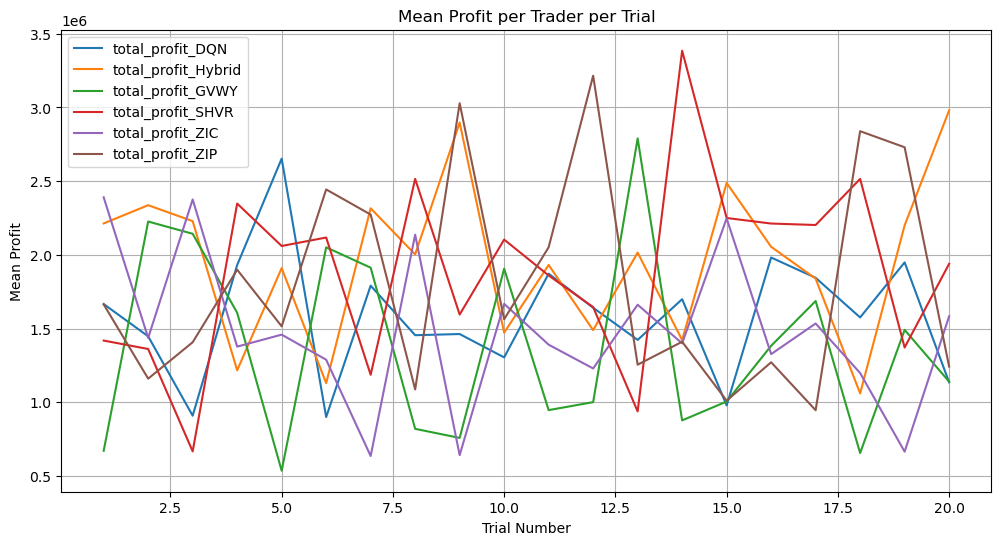

In [4]:
plt.figure(figsize=(12, 6))
for trader in traders:
    mean_profits = full_df.groupby('trial_number')[trader].mean()
    plt.plot(mean_profits, label=trader)

plt.title('Mean Profit per Trader per Trial')
plt.ylabel('Mean Profit')
plt.xlabel('Trial Number')
plt.legend()
plt.grid(True)
plt.savefig('Line Graph of 20 Trials',dpi=300, bbox_inches='tight')
plt.show()

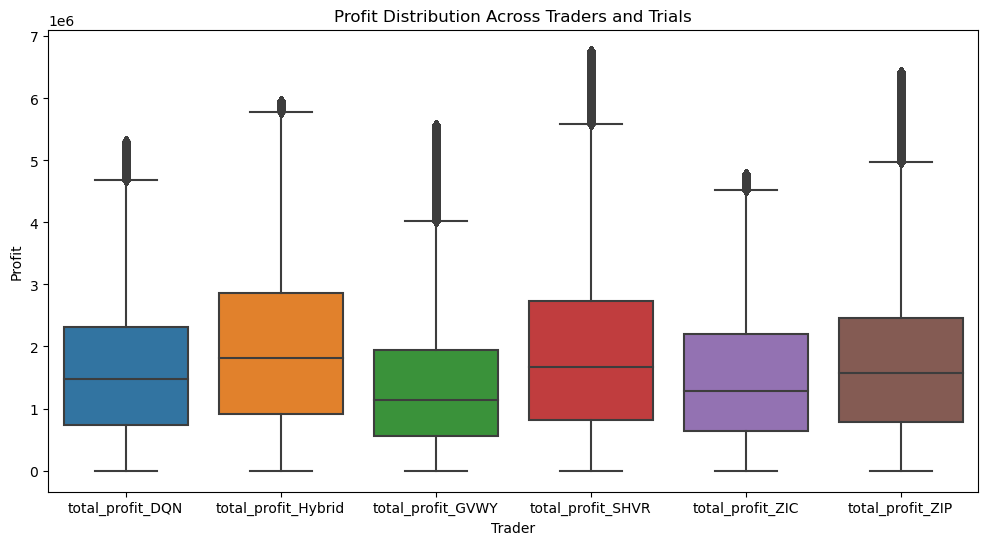

In [4]:
# Box Plot for distributions per trader across trials
plt.figure(figsize=(12, 6))
melted_df = full_df.melt(id_vars=['trial_number'], value_vars=traders, var_name='Trader', value_name='Profit')
sns.boxplot(x='Trader', y='Profit', data=melted_df)
plt.title('Profit Distribution Across Traders and Trials')
plt.ylabel('Profit')
plt.savefig('Profit_Distribution_Across_Traders_and_Trials',dpi=300, bbox_inches='tight')
plt.show()

In [5]:
# Statistical Analysis
# ANOVA Test to compare traders across all trials
profits_by_trader = [full_df[trader].dropna() for trader in traders]
anova_results = f_oneway(*profits_by_trader)
print(f'ANOVA Test: F-statistic = {anova_results.statistic:.3f}, p-value = {anova_results.pvalue:.3f}')

ANOVA Test: F-statistic = 349773.779, p-value = 0.000


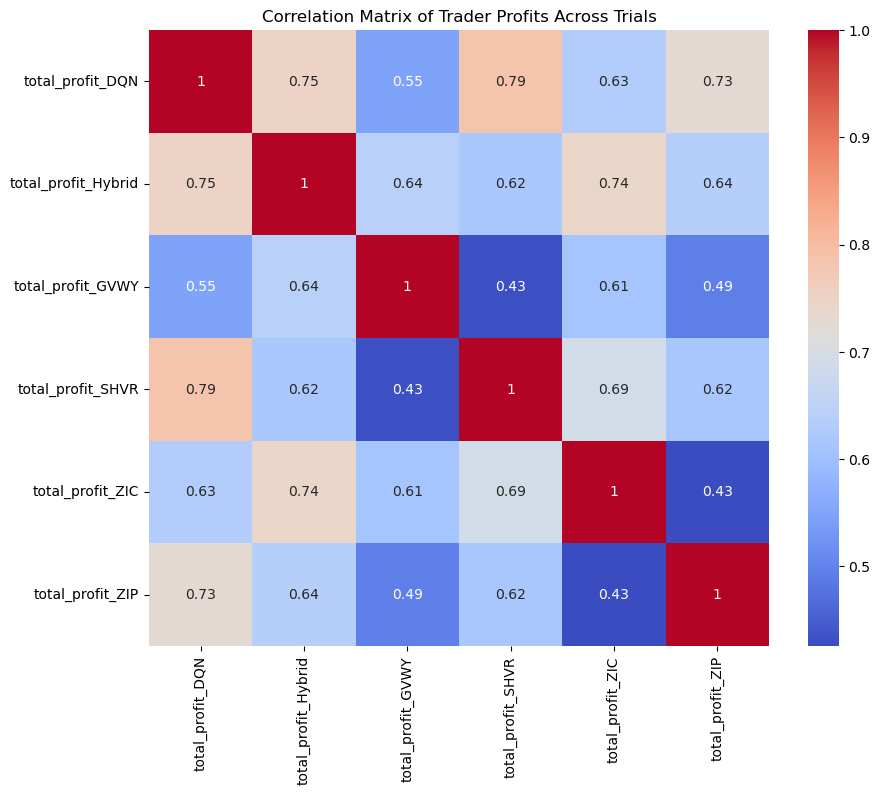

In [12]:
# Correlation Matrix across traders for each trial
correlation_matrix = full_df[traders].corr()
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix of Trader Profits Across Trials')
plt.savefig('Correlation Matrix of Trader Profits Across Trials',dpi=300, bbox_inches='tight')
plt.show()

In [7]:
from scipy.stats import f_oneway, kruskal
# Kruskal-Wallis H Test for comparing medians of profit distributions
kruskal_results = kruskal(*profits_by_trader)
print(f'Kruskal-Wallis H Test: H-statistic = {kruskal_results.statistic:.3f}, p-value = {kruskal_results.pvalue:.3f}')

Kruskal-Wallis H Test: H-statistic = 1461555.871, p-value = 0.000
